In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/shivendutyagi/Datasets/main/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [23]:
for col in df.columns:
  print('Unique Values in ',col+' =',df[col].nunique(),'\nviz.',df[col].unique())

Unique Values in  class = 2 
viz. [1 0]
Unique Values in  cap-shape = 6 
viz. ['x' 'b' 's' 'f' 'k' 'c']
Unique Values in  cap-surface = 4 
viz. ['s' 'y' 'f' 'g']
Unique Values in  cap-color = 10 
viz. ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique Values in  bruises = 2 
viz. ['t' 'f']
Unique Values in  odor = 9 
viz. ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique Values in  gill-attachment = 2 
viz. ['f' 'a']
Unique Values in  gill-spacing = 2 
viz. ['c' 'w']
Unique Values in  gill-size = 2 
viz. ['n' 'b']
Unique Values in  gill-color = 12 
viz. ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique Values in  stalk-shape = 2 
viz. ['e' 't']
Unique Values in  stalk-root = 5 
viz. ['e' 'c' 'b' 'r' '?']
Unique Values in  stalk-surface-above-ring = 4 
viz. ['s' 'f' 'k' 'y']
Unique Values in  stalk-surface-below-ring = 4 
viz. ['s' 'f' 'y' 'k']
Unique Values in  stalk-color-above-ring = 9 
viz. ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique Values in  stalk-color-below-ring = 9 
viz. ['w'

In [30]:
df['veil-type'].isna().sum()

0

So 'veil-type' column has only 1 uniquye value and no missing values. So we can drp that column.

In [9]:
y=df['class']

In [19]:
y[y=='p']=1
y[y=='e']=0
y=y.astype(np.uint8)

In [24]:
x=df.drop(columns=['class','veil-type'],axis=1)

In [25]:
x_enc=pd.get_dummies(x)

In [52]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x_enc,y,test_size=0.3,random_state=42)

In [42]:
!pip install dtreeviz --quiet

In [43]:
import graphviz.backend as be
from dtreeviz.trees import *
from IPython.display import Image,display_svg,SVG

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=None)

In [61]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


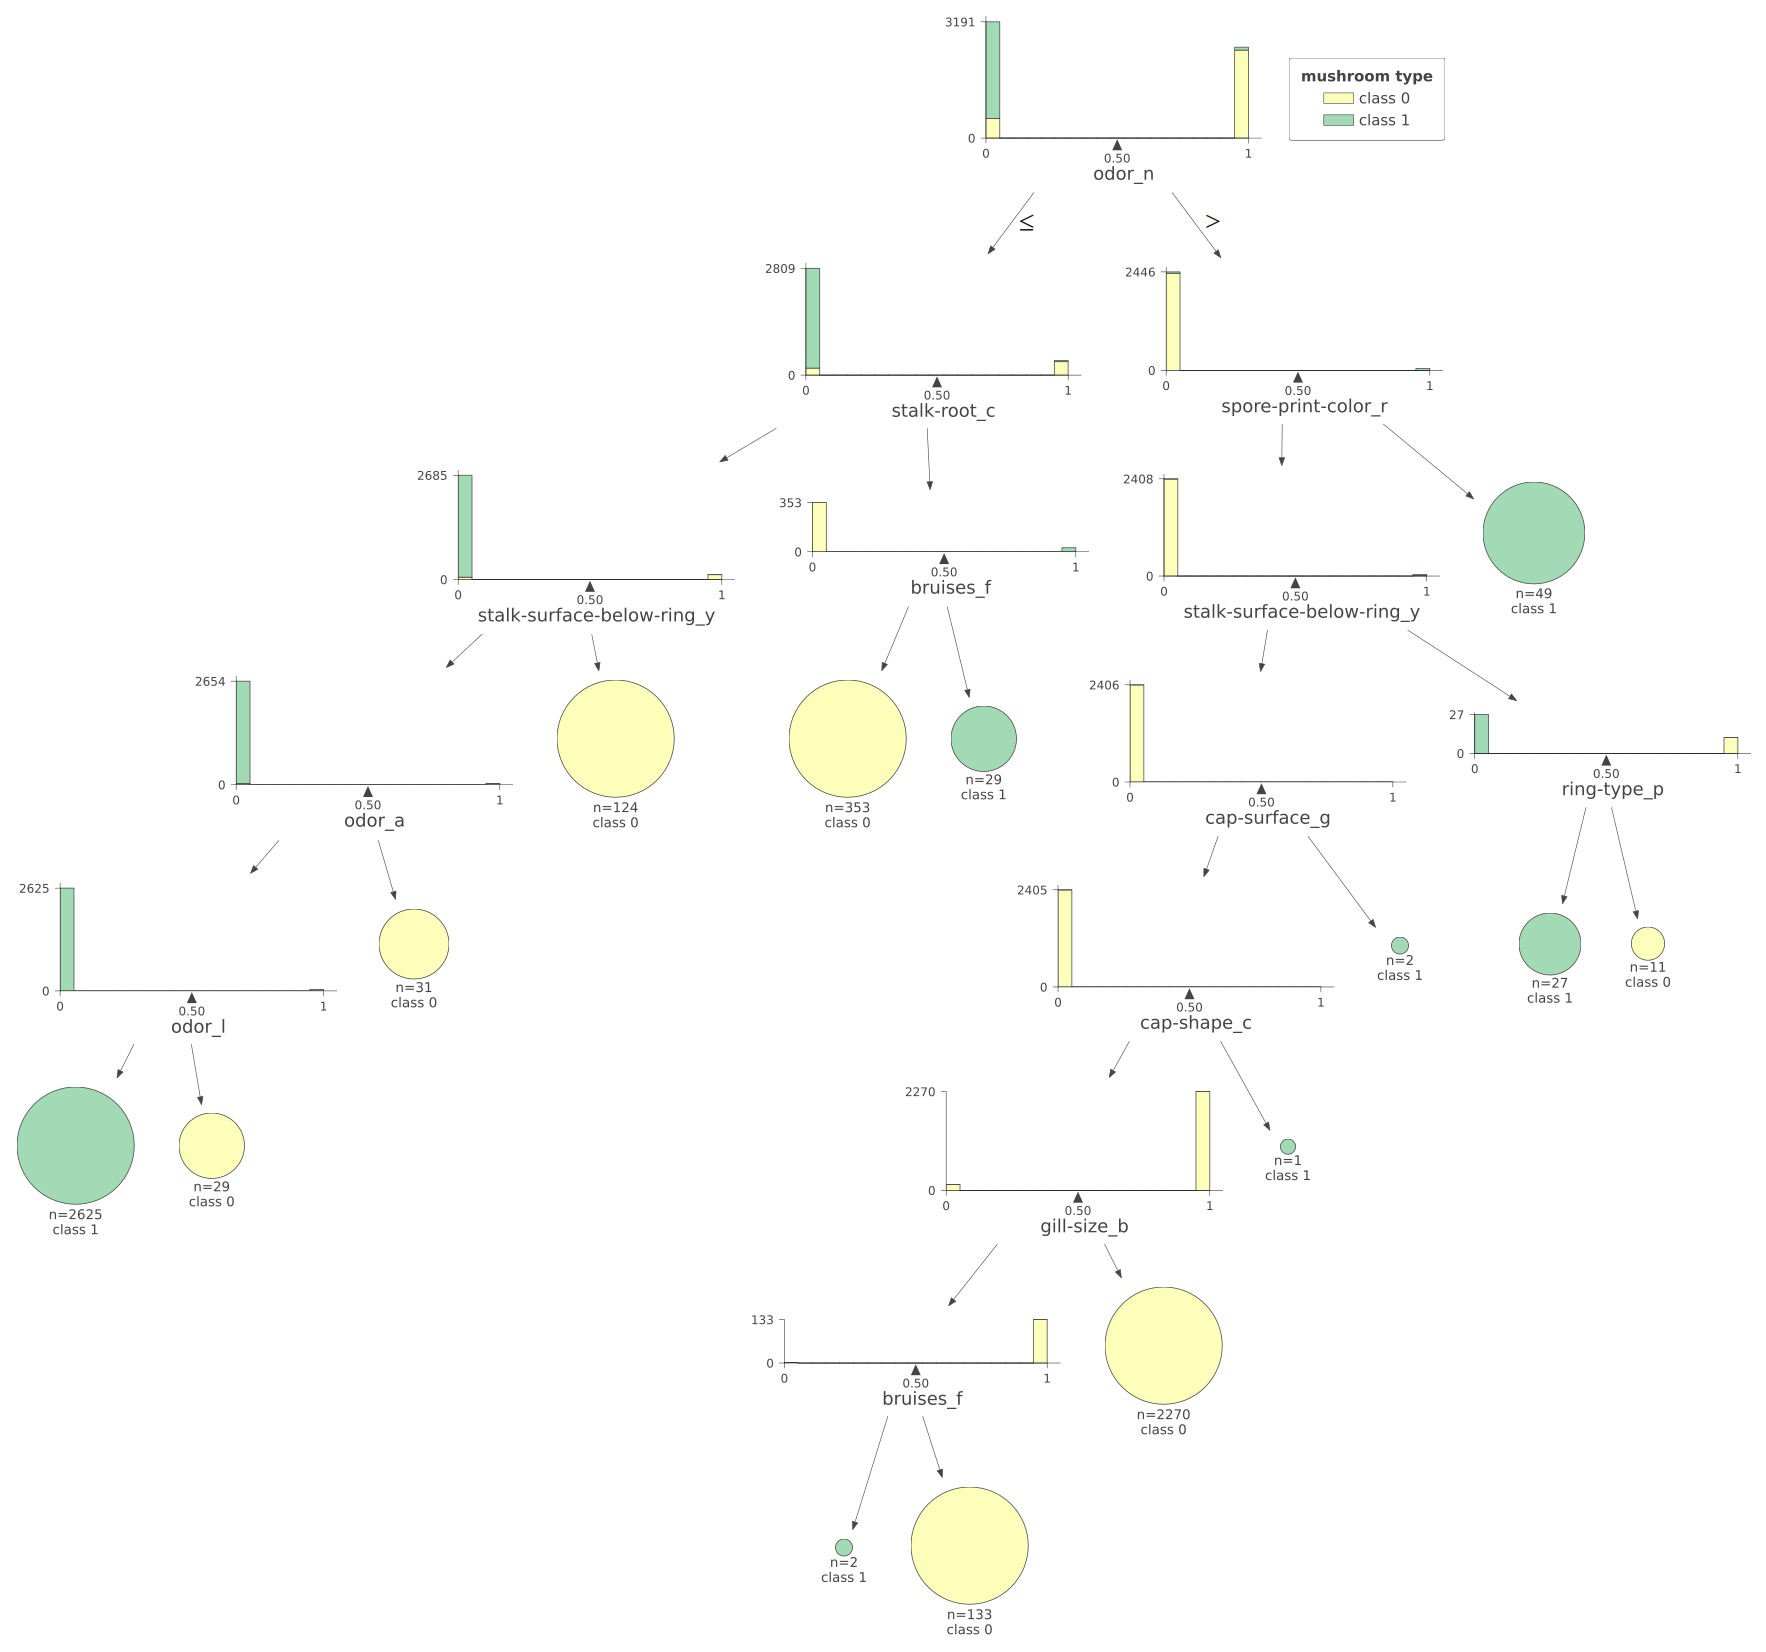

In [62]:
viz=dtreeviz(clf,
             x_train,
             y_train,
             target_name='mushroom type',
             feature_names=x_train.columns,
             scale=2)
viz

In [69]:
from sklearn.metrics import r2_score,plot_confusion_matrix
r2_score(y_test,clf.predict(x_test))

1.0

In [68]:
np.mean(cross_val_score(clf,x_test,y_test,scoring='r2',cv=10))

0.9967114339521119

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


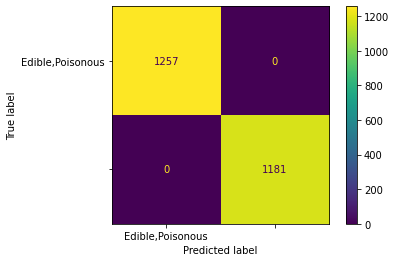

In [67]:
plot_confusion_matrix(clf,x_test,y_test,display_labels=['Edible,Poisonous']);
